## Proyecto TIA: Verificacion de Calidad de PCBs fresadas
1. Primero toca convertir la imagen en blanco y negro
2. Despues se puede contrastar con la real (https://www.electroschematics.com/pcb-defects-detection-opencv/)


### First Attempt:

(<AxesSubplot:title={'center':'Imagen'}>,
 Text(0.5, 1.0, 'Imagen'))

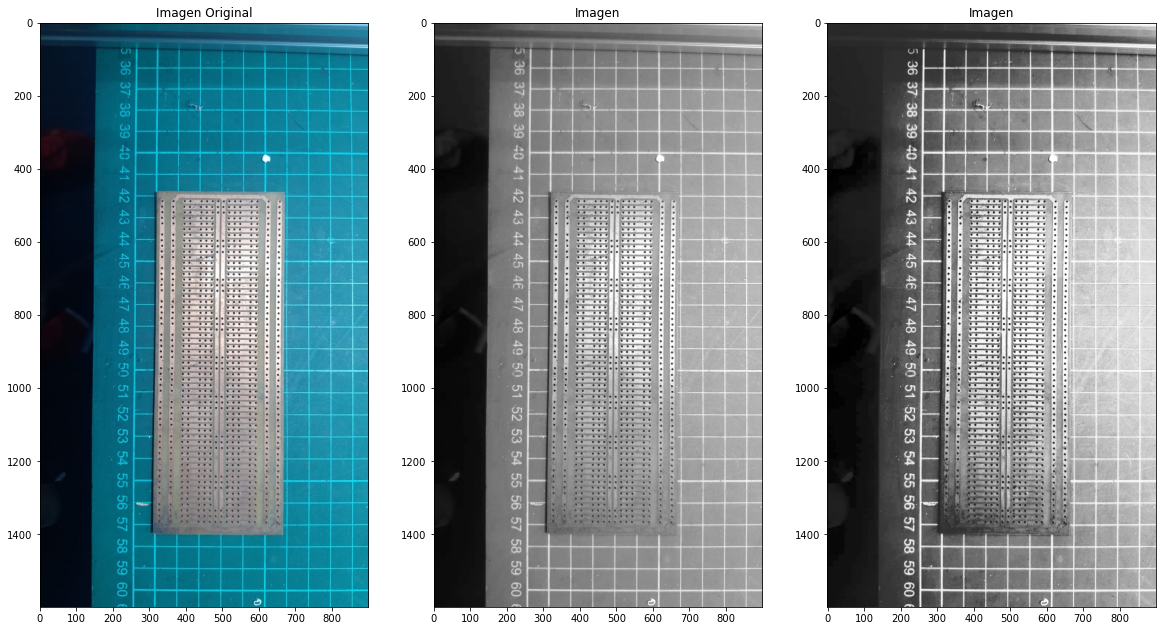

In [3]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

# SE CARGA LA IMAGEN EN ESCALA DE GRISES
img = cv2.imread("./TestPics/PCB11.jpg",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
equ = cv2.equalizeHist(hsv[:,:,2])

plt.figure(1,figsize=(20, 20))
plt.subplot(131), plt.imshow(img), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(hsv[:,:,2], cmap='gray'), plt.title('Imagen')
plt.subplot(133), plt.imshow(equ, cmap='gray'), plt.title('Imagen')

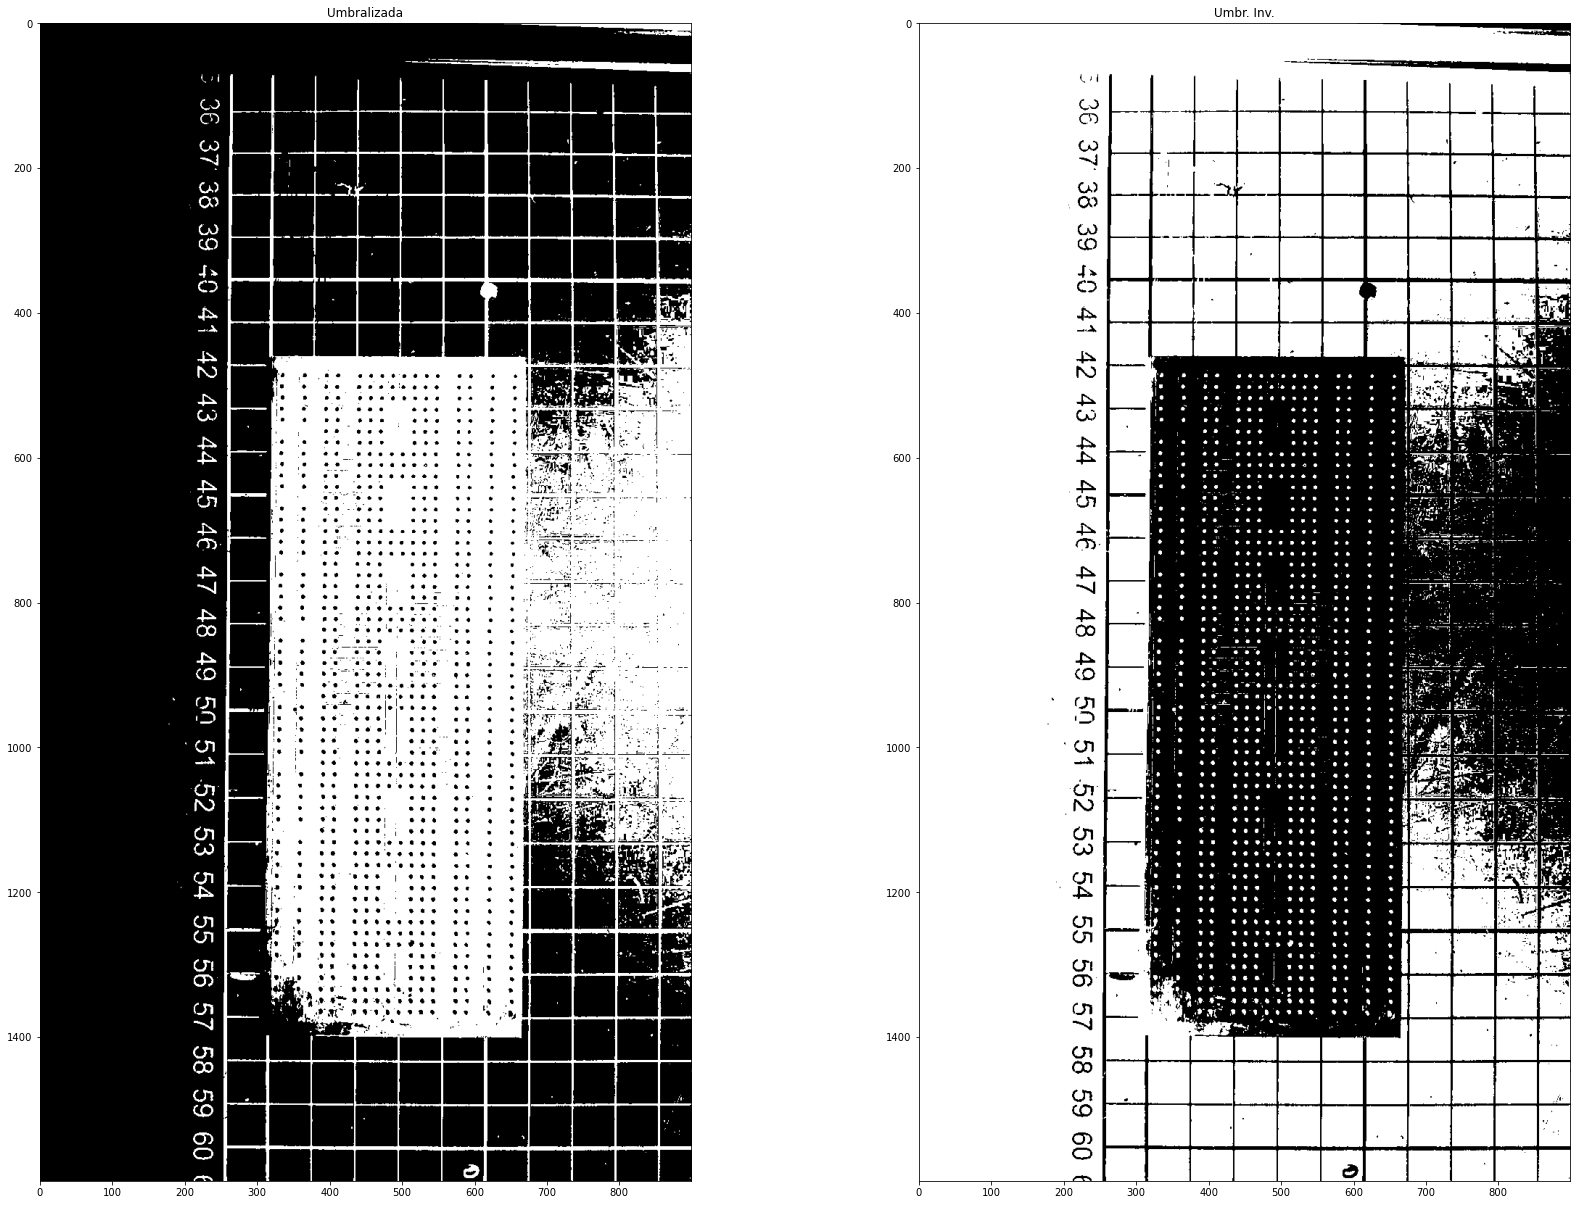

In [3]:
# UMBRALIZACION DE UNA IMAGEN

# SE CARGAN LAS IMAGENES 
img1 = cv2.imread("./TestPics/PCB11.jpg",0)

width, height = img1.shape[:2]
img_umbral = np.zeros((width,height), np.uint8)
img_umbral_inv = np.zeros((width,height), np.uint8)

#DIVISION POR UNA CONSTANTE
C=5 #Valor de la constante
IGMax=0
IGmin=1000000

#DIVISION POR UNA CONSTANTE
H=116 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img1[i,j] < H : 
            img_umbral[i,j] = 0
            img_umbral_inv[i,j] = 255
        else : 
            img_umbral[i,j] = 255
            img_umbral_inv[i,j] = 0
        if img1[i,j] > IGMax: IGMax = img1[i,j]
        if img1[i,j] < IGmin: IGmin = img1[i,j]


#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(121), plt.imshow(img_umbral, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(img_umbral_inv, cmap='gray'), plt.title('Umbr. Inv.')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

Adaptive treshold (gaussian)
Otsu's method


(<AxesSubplot:title={'center':'Umbr. Inv.'}>,
 Text(0.5, 1.0, 'Umbr. Inv.'))

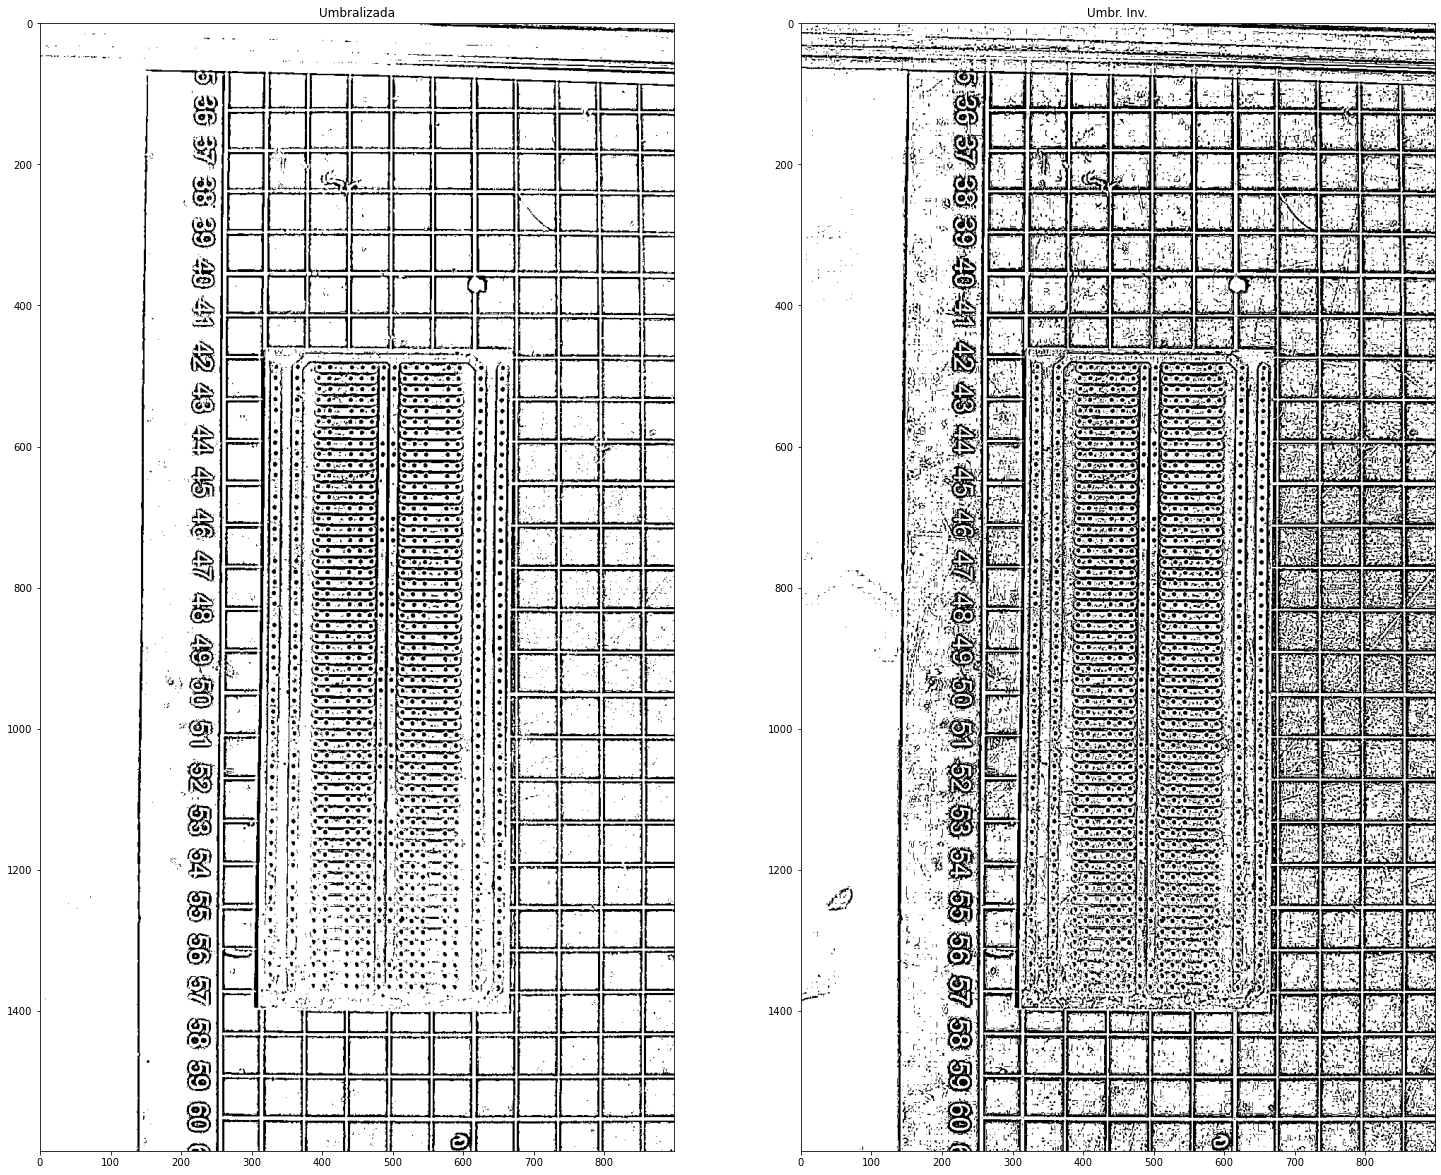

In [4]:
#Adaptative thersholding
# SE CARGAN LAS IMAGENES 
img2 = cv2.imread("./TestPics/PCB11.jpg",0)
img2 = cv2.medianBlur(img2,1)

th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,9,8)
#Gaussiano
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

nlbw = cv2.medianBlur(th2, 7)

blur = cv2.GaussianBlur(img2,(1,1),0)
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(2,figsize=(25, 25))
plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(th3, cmap='gray'), plt.title('Umbr. Inv.')



[ WARN:0@452.083] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/user/Documents/UN/TIA/Proyecto/PCBMillQualityControl/TestPics/PCB1.jpg'): can't open/read file: check file path/integrity


(<AxesSubplot:title={'center':'Umbralizada'}>,
 Text(0.5, 1.0, 'Umbralizada'))

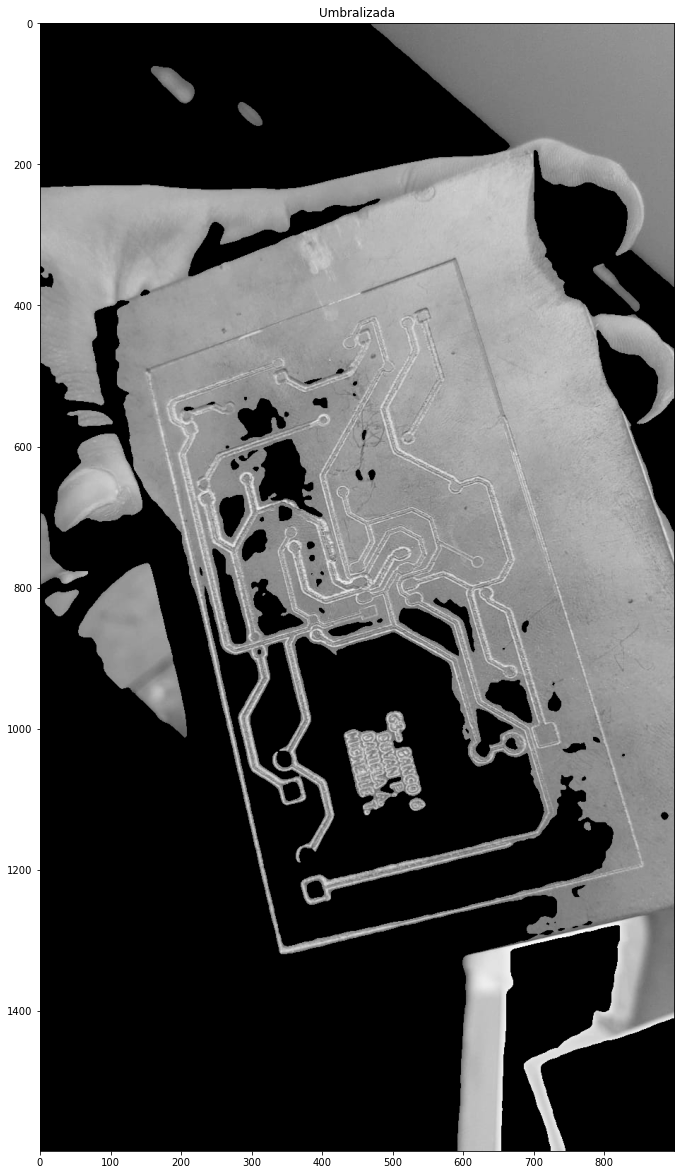

In [7]:
img2 = cv2.imread("./TestPics/PCB14.jpeg",1)
bags_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
bags=img2
blur = cv2.blur(bags,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
low_blue = np.array([120, 60, 60])
high_blue = np.array([250, 250, 250])
mask2 = cv2.inRange(blur2, low_blue, high_blue)
res = cv2.bitwise_and(img2,img2, mask= mask2)
plt.figure(4,figsize=(25, 25))
plt.subplot(121), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2GRAY), cmap='gray'), plt.title('Umbralizada')

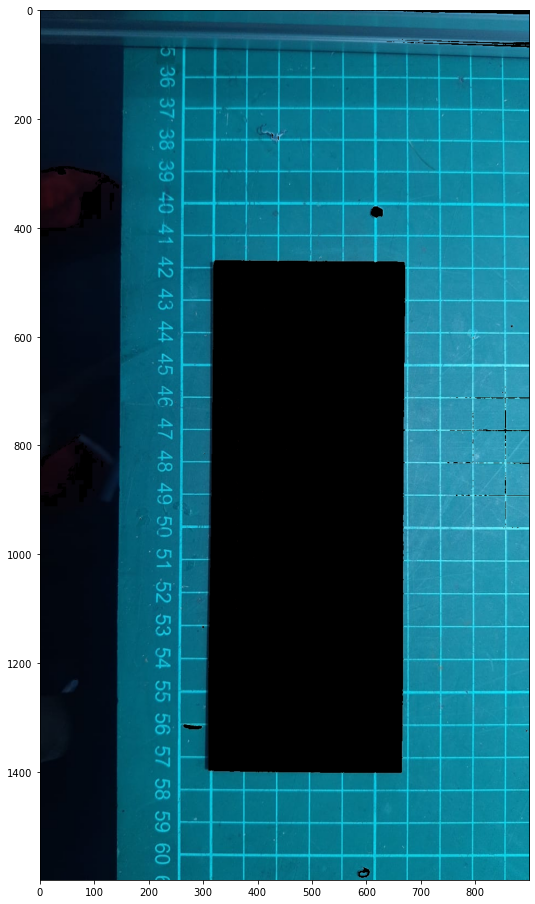

In [141]:
#Segmentacion de Color

img2 = cv2.imread("./TestPics/PCB11.jpg",1)
bags_hsv = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
hsv = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
bags=cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] > 0.01#refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 0.1#refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] > 128
 
#mask = upper_mask*lower_mask*saturation_mask
# saturation_mask = cv2.cvtColor(saturation_mask, cv2.COLOR_HSV2BGR)
# ret, saturation_mask = cv2.threshold(saturation_mask, 0.05 * saturation_mask.max(), 255, 0)
# mask = cv2.bitwise_not(saturation_mask)
mask = saturation_mask
red = bags[:,:,0]*mask
green = bags[:,:,1]*mask
blue = bags[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
plt.figure(3,figsize=(16, 16))
plt.imshow(bags_masked)
#plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')

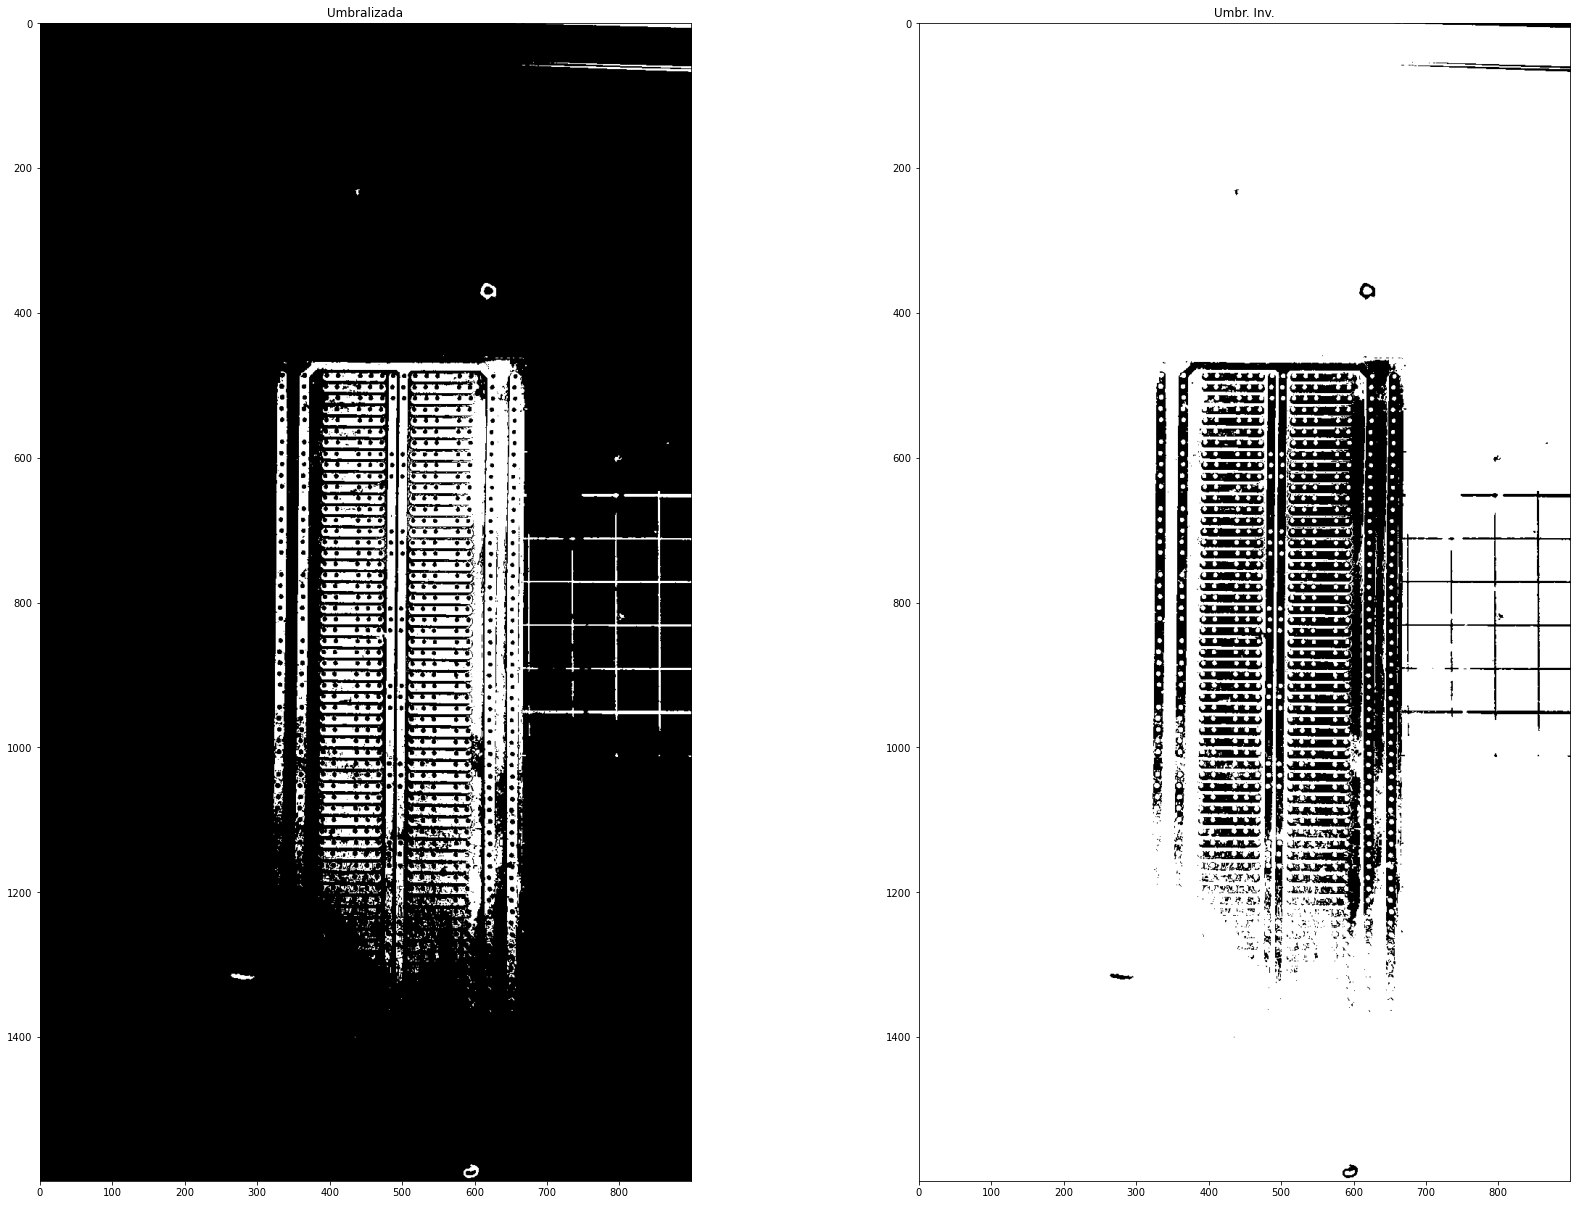

In [7]:
#Repitiendo OTSU

img5 = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
width, height = img5.shape[:2]
img_umbral5 = np.zeros((width,height), np.uint8)
img_umbral_inv5 = np.zeros((width,height), np.uint8)

#DIVISION POR UNA CONSTANTE
C5=5#Valor de la constante
IGMax5=0
IGmin5=1000000

#DIVISION POR UNA CONSTANTE
H5=160 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img5[i,j] < H5: 
            img_umbral5[i,j] = 0
            img_umbral_inv5[i,j] = 255
        else : 
            img_umbral5[i,j] = 255
            img_umbral_inv5[i,j] = 0
        if img5[i,j] > IGMax5: IGMax5 = img5[i,j]
        if img5[i,j] < IGmin5: IGmin5 = img5[i,j]


#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(121), plt.imshow(img_umbral5, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(img_umbral_inv5, cmap='gray'), plt.title('Umbr. Inv.')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

In [10]:
img6 = cv2.medianBlur(img,1)
th2 = cv2.adaptiveThreshold(img6,255,cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY,9,8)
#Gaussiano
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

nlbw = cv2.medianBlur(th2, 7)

blur = cv2.GaussianBlur(img2,(1,1),0)
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(2,figsize=(25, 25))
plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')

error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/thresh.cpp:1674: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'adaptiveThreshold'


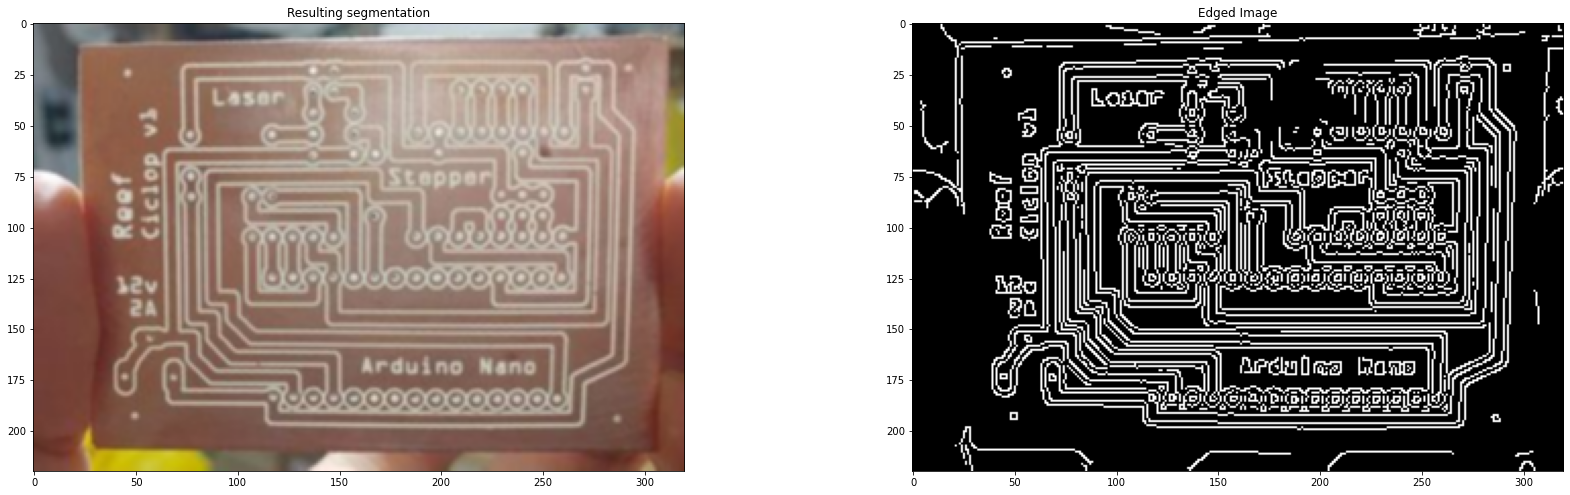

In [128]:
blur = cv2.GaussianBlur(rgb, (3,3), 0)
edges = cv2.Canny(blur,128,100)

#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(121), plt.imshow(blur, cmap='gray'), plt.title('Resulting segmentation')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edged Image')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

### Final Deadline:

* Proyecto
  * Extraer consistentemente la PCB de la imagen
  * Comparacion con imagen de referencia
    * Imagenes de referencia ???
    * Comparacion booleana, extraccion de diferencias
  * Extraer defectos sin comparar con referencia
    * Caminos incompletos
    * Caminos muy delgados
    * caminos pegados
    * Otros?
  * Clasificar defectos
* Informe
* Presentacion

Size of image = (1599, 899, 3)


(<AxesSubplot:title={'center':'Imagen'}>,
 Text(0.5, 1.0, 'Imagen'))

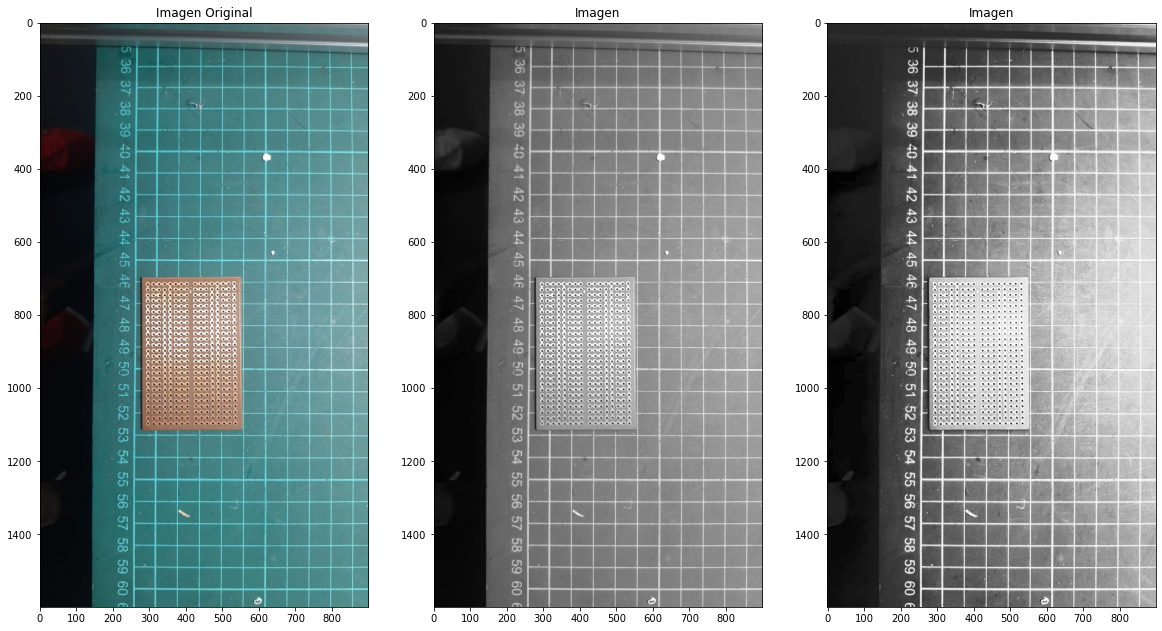

In [42]:
import os

import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

testImages = os.listdir("./TestPics/")
# SE CARGA LA IMAGEN EN ESCALA DE GRISES
img = cv2.imread(f"./TestPics/{testImages[6]}",1)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
equ = cv2.equalizeHist(hsv[:,:,2])

height, width, *_ = img.shape
area = height*width
print(f"Size of image = {img.shape}")
scale = img.shape[1]/899

plt.figure(1,figsize=(20, 20))
plt.subplot(131), plt.imshow(img), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(hsv[:,:,2], cmap='gray'), plt.title('Imagen')
plt.subplot(133), plt.imshow(equ, cmap='gray'), plt.title('Imagen')

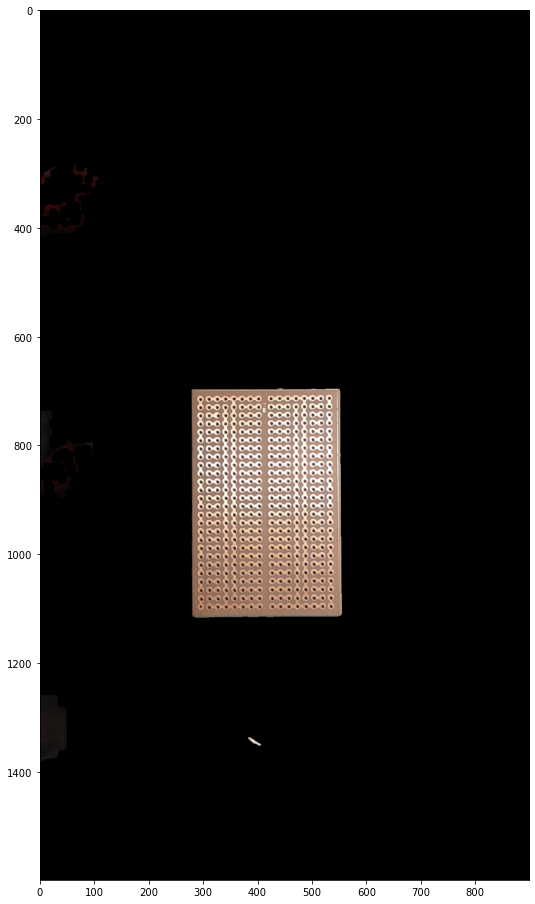

In [44]:
#Segmentacion de Color (No funciona bien en todos los casos)
bags = img.copy()
bags_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] >= 0#refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 36#refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] >= 25
mask = upper_mask*lower_mask*saturation_mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12,12))
morph = cv2.morphologyEx(mask.astype(np.int8)*255, cv2.MORPH_CLOSE, kernel)
# corners = cv2.goodFeaturesToTrack(morph, 4, 0.01, 10)
# corners = np.int0(corners)
mask = morph.astype(bool)
red = bags[:,:,0]*mask
green = bags[:,:,1]*mask
blue = bags[:,:,2]*mask
bags_masked = np.copy(np.dstack((red,green,blue)))

# cv2.inRange(hsv_img, ORANGE_MIN, ORANGE_MAX) ?????

plt.figure(3,figsize=(16, 16))
plt.imshow(bags_masked)
#plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')

In [57]:
# img = cv2.imread('corner1.png')
  
# convert image to gray scale image
gray = cv2.cvtColor(bags_masked, cv2.COLOR_BGR2GRAY)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12,12))
# morph = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# detect corners with the goodFeaturesToTrack function.
# corners = cv2.goodFeaturesToTrack(mask, 4, 0.01, 10)
# corners = np.int0(corners)
  
# we iterate through each corner, 
# making a circle at each point that we think is a corner.
for i in corners:
    x, y = i.ravel()
    cv2.circle(bags_masked, (x, y), 3, 255, -1)
plt.figure(3,figsize=(16, 16))
plt.imshow(bags_masked, cmap="gray"), plt.show()

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'goodFeaturesToTrack'
> Overload resolution failed:
>  - image data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'image'
>  - goodFeaturesToTrack() missing required argument 'mask' (pos 5)
>  - goodFeaturesToTrack() missing required argument 'mask' (pos 5)


9 3
Size of image = (1599, 899, 3)
0
index 931
Size of image = (3264, 1836, 3)
0
index 932
Size of image = (569, 1756, 3)
0
index 933
Size of image = (465, 1080, 3)
0
index 934
Size of image = (276, 400, 3)
16
index 935


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


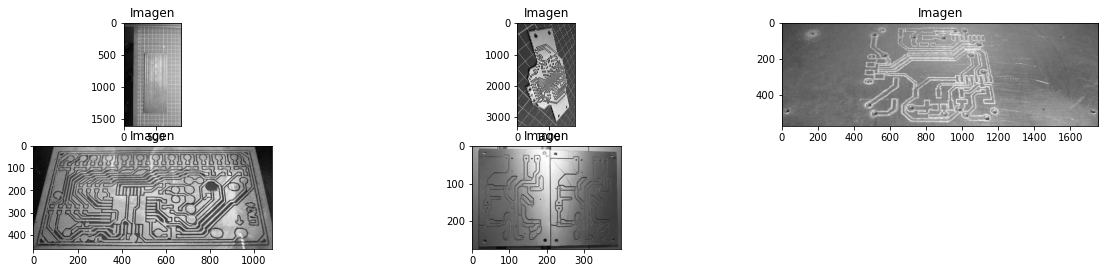

In [4]:
#Multiple images

plt.figure(1,figsize=(20, 20))
col = 3
row = int(np.ceil(len(testImages)/col))
print(row,col)
for i, path in enumerate(testImages):
    img = cv2.imread(f"./TestPics/{path}",1)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    equ = cv2.equalizeHist(hsv[:,:,2])

    height, width, *_ = img.shape
    area = height*width
    print(f"Size of image = {img.shape}")
    scale = img.shape[1]/899

    bags_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    bags=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    print(np.min(bags_hsv[:,:,1]))
    #refer to hue channel (in the colorbar)
    lower_mask = bags_hsv[:,:,0] > 0#refer to hue channel (in the colorbar)
    upper_mask = bags_hsv[:,:,0] < 255#refer to transparency channel (in the colorbar)
    saturation_mask = bags_hsv[:,:,1] > 128
    mask = upper_mask*lower_mask*saturation_mask
    red = bags[:,:,0]*mask
    green = bags[:,:,1]*mask
    blue = bags[:,:,2]*mask
    bags_masked = np.dstack((red,green,blue))
    # row = int(np.ceil(1+(i+1)/col))
    # col = 1+(i%3)
    index = f"{row}{col}{i+1}"
    print("index",index)
    plt.subplot(int(index)), plt.imshow(hsv[:,:,2], cmap='gray'), plt.title('Imagen')

(<AxesSubplot:title={'center':'borders'}>,
 Text(0.5, 1.0, 'borders'))

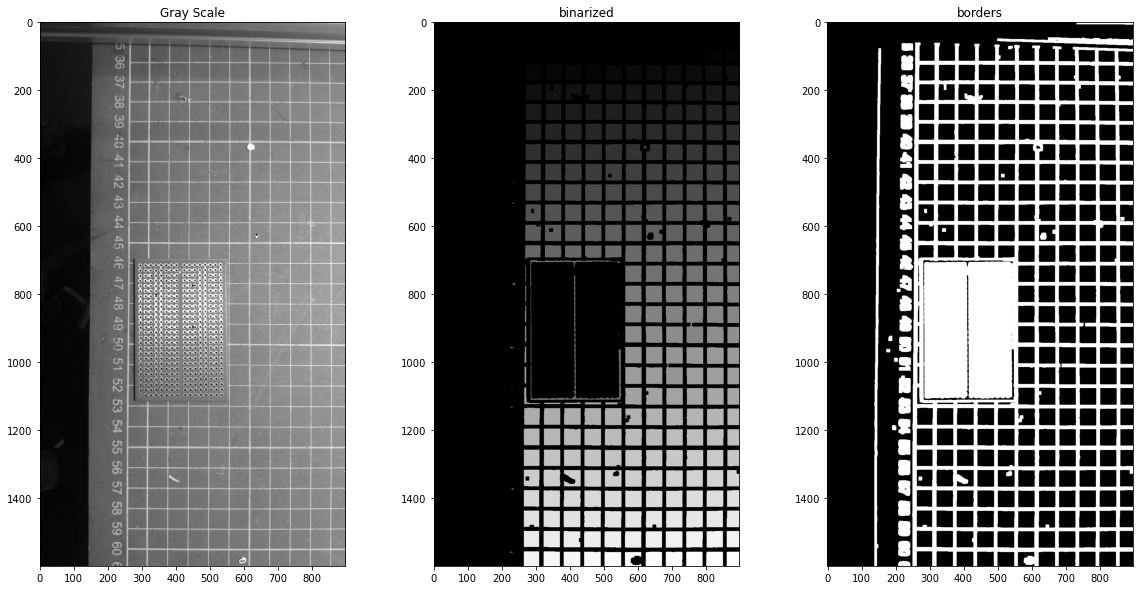

In [19]:
gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img, (int(5*scale),int(5*scale)), 0)
edges = cv2.Canny(blur,128,100)
edgeKernel = np.ones((int(8*scale),int(8*scale)), np.uint8)
edges=cv2.dilate(edges,edgeKernel,iterations=1)
th1,img_bin = cv2.threshold(gray_scale,125,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
img_bin=~img_bin

_, labels, stats,_ = cv2.connectedComponentsWithStats(~edges, connectivity=8, ltype=cv2.CV_32S)

fig = plt.figure(1,figsize=(20, 10))
plt.subplot(131), plt.imshow(gray_scale, cmap="gray"), plt.title('Gray Scale')
plt.subplot(132), plt.imshow(labels, cmap='gray'), plt.title('binarized')
plt.subplot(133), plt.imshow(edges, cmap='gray'), plt.title('borders')
# fig.savefig('./Output/full_figure.png')

(<AxesSubplot:title={'center':'imagen binarizada final'}>,
 Text(0.5, 1.0, 'imagen binarizada final'))

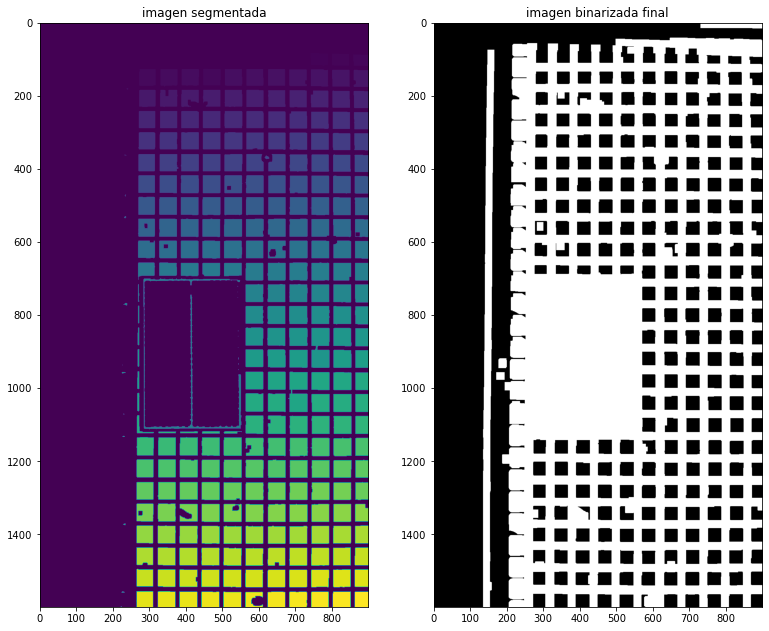

In [21]:
line_min_width = int(np.rint(12*scale))
line_min_height = int(np.rint(12*scale))
mask = np.zeros(edges.shape, dtype="uint8")
kernel_h = np.ones((1,line_min_width), np.uint8)
kernel_v = np.ones((line_min_height,1), np.uint8)

img_bin_h = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel_h)
img_bin_v = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel_v)
img_bin_final=img_bin_h|img_bin_v

final_kernel = np.ones((line_min_width,line_min_height), np.uint8)
img_bin_final=cv2.dilate(img_bin_final,final_kernel,iterations=1)

# _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

plt.figure(1,figsize=(20, 20))
plt.subplot(131), plt.imshow(labels), plt.title('imagen segmentada')
plt.subplot(132), plt.imshow(img_bin_final, cmap='gray'), plt.title('imagen binarizada final')

0


(<AxesSubplot:title={'center':'imagen final'}>,
 Text(0.5, 1.0, 'imagen final'))

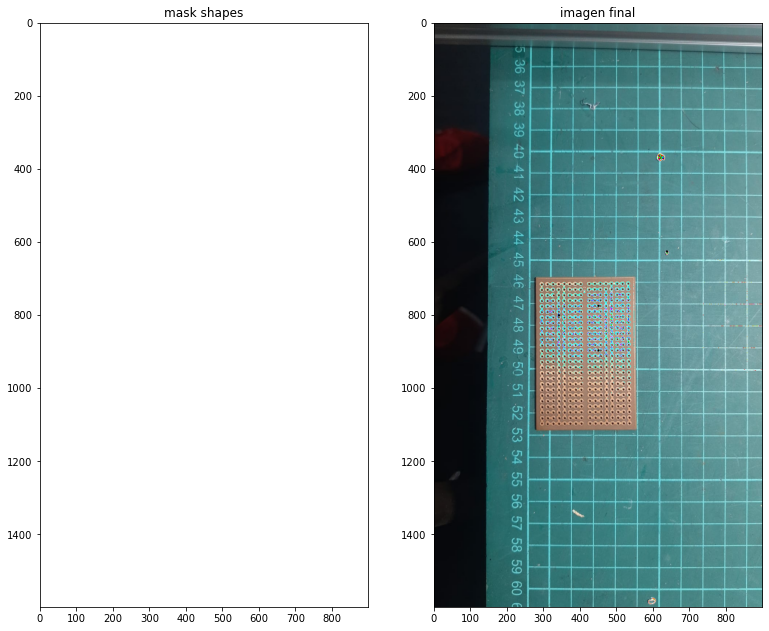

In [20]:
mask = np.zeros(img.shape, dtype="uint8")
newStats = []
for x,y,w,h,_area in stats[2:]:
    if 0.02*area < _area < 0.85*area:
        newStats.append((x,y,w,h,_area))
newStats.sort(key=lambda x:x[-1])        
if newStats:
    for x,y,w,h,_area in newStats[0:3]:
        cv2.fillPoly(mask, np.array([[[x,y],[x+w,y],[x+w,y+h],[x,y+h]]]), color=(255, 255, 255))
else:
    mask = np.ones(img.shape, dtype="uint8")*255
print(len(newStats))

# recreation = cv2.polylines(recreation, [points], isClosed, color, thickness)

plt.figure(1,figsize=(20, 20))
plt.subplot(131), plt.imshow(mask), plt.title('mask shapes')
plt.subplot(132), plt.imshow(mask*~img), plt.title('imagen final')

Cargando imagen PCB10.jpg
Size of image = (1599, 899, 3)
(1599, 899) <class 'numpy.ndarray'>
(1599, 899) <class 'numpy.ndarray'>


(<matplotlib.image.AxesImage at 0x7fa7e4f85480>,
 Text(0.5, 1.0, 'Imagen segmentada'))

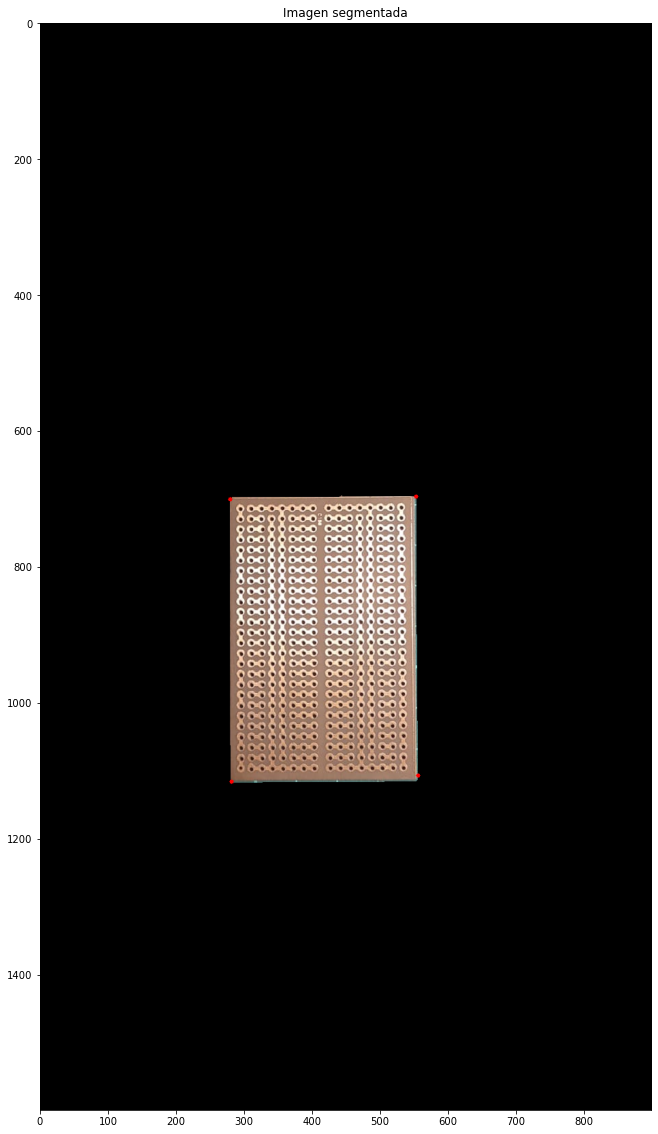

In [65]:
import os

import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

testImages = os.listdir("./TestPics/")
# SE CARGA LA IMAGEN EN ESCALA DE GRISES
for text in testImages:
    if "PCB10" in text:
        loadedImage = text
print(f"Cargando imagen {loadedImage}")
img = cv2.imread(f"./TestPics/{loadedImage}",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
equ = cv2.equalizeHist(hsv[:,:,2])

height, width, *_ = img.shape
area = height*width
print(f"Size of image = {img.shape}")
scale = img.shape[1]/899


ORANGE_MIN = np.array([0, 0, 0],np.uint8)
ORANGE_MAX = np.array([36, 255, 255],np.uint8)

thresh = cv2.inRange(hsv, ORANGE_MIN, ORANGE_MAX)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(20*scale),int(20*scale)))
# morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(160*scale),int(160*scale)))
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)

print(morph.shape, type(morph))
masked_old = cv2.bitwise_and(img, img, mask=morph)

contours,h = cv2.findContours(morph,1,2)
mask = np.zeros(morph.shape, np.uint8)

for cnt in contours: 
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True) 
    # print(len(approx))
    # if len(approx)==5: 
    #     print("pentagon" )
    #     # cv2.drawContours(img,[cnt],0,255,-1) 
    # elif len(approx)==3: 
    #     print( "triangle" )
        # cv2.drawContours(img,[cnt],0,(0,255,0),-1) 
    if len(approx)==4: 
        # print( "square" )
        cv2.drawContours(mask,[cnt],0,255,-1) 
    # elif len(approx) == 9: 
    #     print( "half-circle" )
    #     # cv2.drawContours(img,[cnt],0,(255,255,0),-1) 
    # elif len(approx) > 15: 
    #     print( "circle" )
        # cv2.drawContours(img,[cnt],0,(0,255,255),-1) 

print(mask.shape, type(mask))
masked = cv2.bitwise_and(img, img, mask=mask)
gray = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(mask, 4, 0.15, 115*scale)
if corners is not None:
    corners = np.int0(corners)
    for i in corners:
        x, y = i.ravel()
        cv2.circle(masked, (x, y), 3, 255, -1)

plt.figure(1,figsize=(20, 20))
plt.imshow(masked, cmap="gray"), plt.title('Imagen segmentada')


In [ ]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1500
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else : 
  detector = cv2.SimpleBlobDetector_create(params)

  detector

# Detect blobs.
keypoints = detector.detect(mask)
print(keypoints)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(masked, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)